# ME5413 Homework 3: Planning

## Task 0: Load the Map

In [25]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import time
import heapq
%matplotlib inline

/tmp/ipykernel_9228/187924686.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
/tmp/ipykernel_9228/187924686.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


Size of the map: (1000, 1000)
Occupied Cells: 823039
Free Cells: 176961


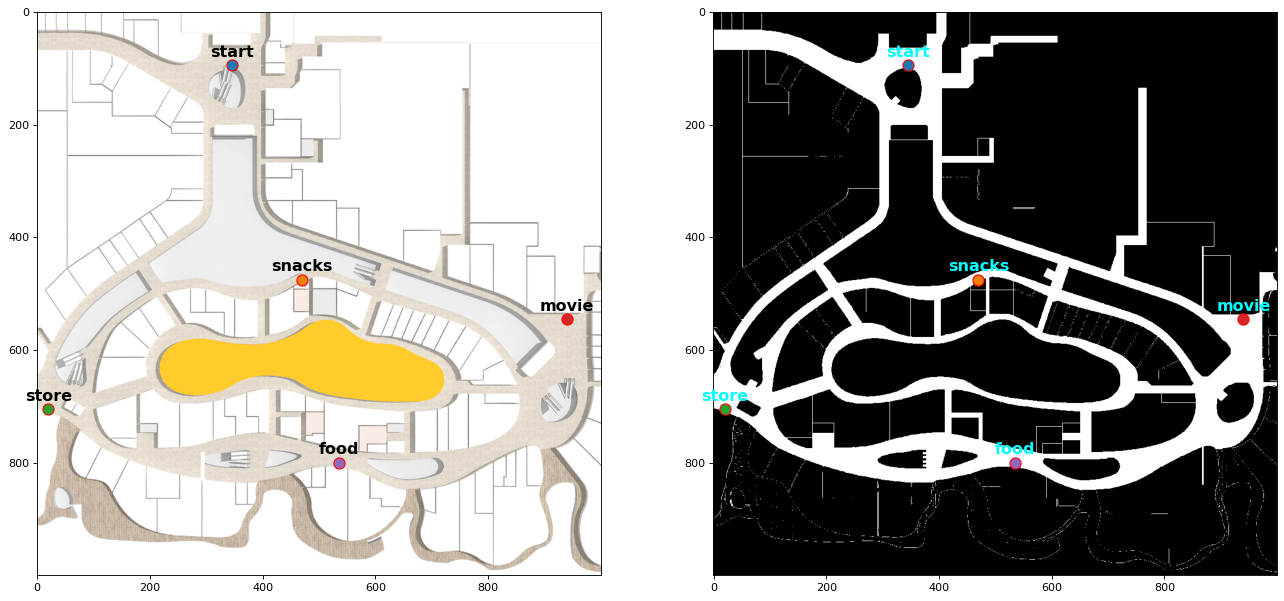

Cell start is free: True
Cell snacks is free: True
Cell store is free: True
Cell movie is free: True
Cell food is free: True


In [26]:
# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()
print("Size of the map:", grid_map.shape)
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# Plot the locaitons on the map 
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
plt.show()

# Check if the designated locations are free
for key, value in locations.items():
    print(f"Cell {key} is free: {grid_map[value[0], value[1]] == 255}")

## Task 1

Implement A*

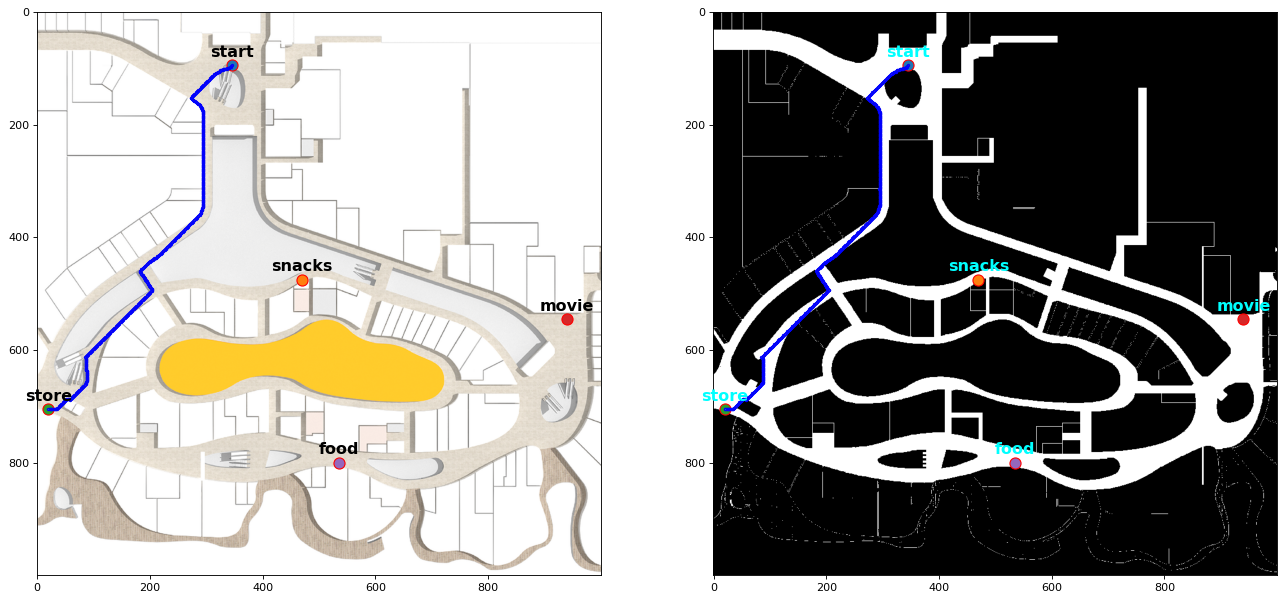

Your planned path:
[(345, 95), (344, 96), (343, 97), (342, 98), (341, 99), (340, 100), (339, 100), (338, 100), (337, 100), (336, 101), (335, 101), (334, 101), (333, 101), (332, 102), (331, 102), (330, 102), (329, 103), (328, 103), (327, 103), (326, 104), (325, 104), (324, 105), (323, 106), (322, 106), (321, 107), (320, 107), (319, 108), (318, 109), (317, 109), (316, 110), (315, 110), (314, 111), (313, 112), (312, 113), (311, 114), (310, 115), (309, 116), (308, 117), (307, 118), (306, 119), (305, 120), (304, 121), (303, 122), (302, 123), (301, 124), (300, 125), (299, 126), (298, 127), (297, 128), (296, 129), (295, 130), (294, 131), (293, 132), (292, 133), (291, 134), (290, 135), (289, 136), (288, 137), (287, 138), (286, 139), (285, 140), (284, 141), (283, 142), (282, 143), (281, 144), (280, 145), (279, 146), (278, 147), (277, 148), (276, 149), (275, 150), (274, 151), (273, 152), (273, 153), (274, 154), (275, 155), (276, 156), (277, 157), (278, 158), (279, 158), (280, 159), (281, 160), (

In [31]:

# Define the heuristic function
def h(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Define the cost function
def cost(a, b):
    (x1, y1) = a
    (x2, y2) = b
    if x1 == x2 or y1 == y2:
        return 0.2
    else:
        return 0.282

# Define the function to get the neighbors of a node
def get_neighbors(node):
    dirs = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    result = []
    for dir in dirs:
        neighbor = (node[0] + dir[0], node[1] + dir[1])
        if 0 <= neighbor[0] < grid_map.shape[0] and 0 <= neighbor[1] < grid_map.shape[1] and grid_map[neighbor[0], neighbor[1]] == 255:
            result.append(neighbor)
    return result

# Define the function to reconstruct the path
def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.append(current)
    path.reverse()
    return path

# Define the A* algorithm
def a_star(start, goal):
    start_time = time.time()
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    visited_nodes = 0

    while open_set:
        current = heapq.heappop(open_set)[1]
        visited_nodes += 1

        if current == goal:
            path = reconstruct_path(came_from, current)
            return path, g_score[current], visited_nodes, time.time() - start_time

        for neighbor in get_neighbors(current):
            tentative_g_score = g_score[current] + cost(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                heapq.heappush(open_set, (tentative_g_score + h(neighbor, goal), neighbor))

    return None

# Run the A* algorithm
start = tuple(locations['start'])
goal = tuple(locations['store'])
path, distance, visited_nodes, run_time = a_star(start, goal)

# Plot the path
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
for node in path:
    plt.plot(node[0], node[1], marker="o", markersize=2, markeredgecolor="blue")
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
for node in path:
    plt.plot(node[0], node[1], marker="o", markersize=2, markeredgecolor="blue")
plt.show()

# Print the results
print("Your planned path:")
print(path)
print("The total travelled distance in meters:", distance)
print("The number of the cells visited by your algorithm:", visited_nodes)
print("The total run time of your algorithm:", run_time)

Adjacency matrix  A* output

In [28]:
matrix = np.zeros((len(locations), len(locations)))

# 使用两个嵌套循环来计算每对点之间的距离
for i, location1 in enumerate(locations.values()):
    for j, location2 in enumerate(locations.values()):
        # 使用Dijkstra算法计算两点之间的最短距离
        if i == j:
            continue
        _, distance, _, _ = a_star(tuple(location1), tuple(location2))
        matrix[i, j] = distance

print(matrix)

[[  0.    142.876 162.324 180.642 229.006]
 [152.87    0.    121.62  130.008 135.174]
 [165.564 116.374   0.    253.242 114.568]
 [225.56  108.844 239.936   0.    197.514]
 [233.808 130.466 121.436 116.302   0.   ]]


 Implement Dijkstra

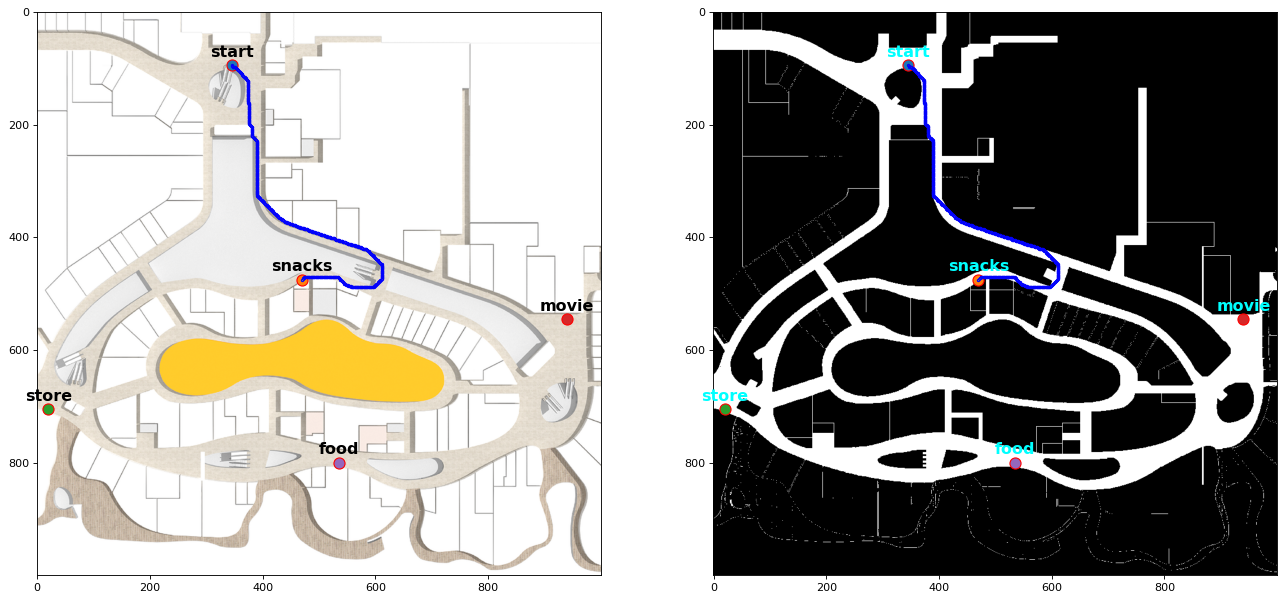

Your planned path:
[(345, 95), (346, 96), (347, 97), (348, 98), (349, 98), (350, 98), (351, 98), (352, 99), (353, 100), (354, 101), (355, 102), (356, 103), (357, 104), (358, 105), (359, 106), (360, 107), (361, 108), (362, 109), (363, 110), (363, 111), (364, 112), (365, 113), (366, 114), (367, 115), (368, 116), (369, 117), (370, 118), (371, 119), (372, 120), (373, 121), (374, 122), (374, 123), (374, 124), (374, 125), (374, 126), (374, 127), (374, 128), (374, 129), (374, 130), (374, 131), (374, 132), (374, 133), (374, 134), (374, 135), (374, 136), (374, 137), (374, 138), (374, 139), (374, 140), (374, 141), (374, 142), (374, 143), (374, 144), (374, 145), (374, 146), (374, 147), (374, 148), (374, 149), (374, 150), (374, 151), (374, 152), (374, 153), (374, 154), (374, 155), (374, 156), (374, 157), (374, 158), (374, 159), (374, 160), (374, 161), (375, 162), (375, 163), (375, 164), (375, 165), (375, 166), (375, 167), (375, 168), (375, 169), (375, 170), (375, 171), (375, 172), (375, 173), (375

In [29]:

# Define the cost function
def cost(a, b):
    (x1, y1) = a
    (x2, y2) = b
    if x1 == x2 or y1 == y2:
        return 0.2
    else:
        return 0.282

# Define the function to get the neighbors of a node
def get_neighbors(node):
    dirs = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    result = []
    for dir in dirs:
        neighbor = (node[0] + dir[0], node[1] + dir[1])
        if 0 <= neighbor[0] < grid_map.shape[0] and 0 <= neighbor[1] < grid_map.shape[1] and grid_map[neighbor[0], neighbor[1]] == 255:
            result.append(neighbor)
    return result

# Define the function to reconstruct the path
def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.append(current)
    path.reverse()
    return path

# Define the Dijkstra algorithm
def dijkstra(start, goal):
    start_time = time.time()
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    visited_nodes = 0

    while open_set:
        current = heapq.heappop(open_set)[1]
        visited_nodes += 1

        if current == goal:
            path = reconstruct_path(came_from, current)
            return path, g_score[current], visited_nodes, time.time() - start_time

        for neighbor in get_neighbors(current):
            tentative_g_score = g_score[current] + cost(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                heapq.heappush(open_set, (tentative_g_score, neighbor))

    return None

# Run the Dijkstra algorithm
start = tuple(locations['start'])
goal = tuple(locations['snacks'])
path, distance, visited_nodes, run_time = dijkstra(start, goal)

# Plot the path
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
for node in path:
    plt.plot(node[0], node[1], marker="o", markersize=2, markeredgecolor="blue")
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
for node in path:
    plt.plot(node[0], node[1], marker="o", markersize=2, markeredgecolor="blue")
plt.show()

# Print the results
print("Your planned path:")
print(path)
print("The total travelled distance in meters:", distance)
print("The number of the cells visited by your algorithm:", visited_nodes)
print("The total run time of your algorithm:", run_time)

Adjacency matrix  Dijkstra output

In [30]:
matrix = np.zeros((len(locations), len(locations)))

# 使用两个嵌套循环来计算每对点之间的距离
for i, location1 in enumerate(locations.values()):
    for j, location2 in enumerate(locations.values()):
        # 使用Dijkstra算法计算两点之间的最短距离
        if i == j:
            continue
        _, distance, _, _ = dijkstra(tuple(location1), tuple(location2))
        matrix[i, j] = distance

print(matrix)

[[  0.    140.882 154.196 178.202 218.636]
 [140.882   0.    114.17  106.418 129.528]
 [154.196 114.17    0.    208.354 110.79 ]
 [178.202 106.418 208.354   0.    111.232]
 [218.636 129.528 110.79  111.232   0.   ]]


## Task 2

In [11]:
# 创建一个完全图
graph = nx.complete_graph(locations.keys())

test_count = 0
# 初始化所有边的权重为0
for u, v in graph.edges():
    test_count += 1
    graph[u][v]['weight'] = test_count

# 输出图的基本信息来确认
print("Nodes in the graph:", graph.nodes())
# 打印邻接矩阵
print("Adjacency Matrix:")
print(nx.to_numpy_array(graph, weight='weight'))

Nodes in the graph: ['start', 'snacks', 'store', 'movie', 'food']
Adjacency Matrix:
[[ 0.  1.  2.  3.  4.]
 [ 1.  0.  5.  6.  7.]
 [ 2.  5.  0.  8.  9.]
 [ 3.  6.  8.  0. 10.]
 [ 4.  7.  9. 10.  0.]]


In [14]:
# 开始计时
start_time = time.time()

# 假设 graph 是你的图对象
# 确保 nodes 是图中节点的列表，node_index 是节点到索引的映射
nodes = list(graph.nodes())
n = len(nodes)
node_index = {node: i for i, node in enumerate(nodes)}

# 初始化 dp 和 parent 数组
dp = np.full((1 << n, n), np.inf)
parent = np.full((1 << n, n), -1)
dp[1][0] = 0  # 假设从节点 0 开始

# 动态规划计算
for mask in range(1, 1 << n):
    for u in range(n):
        if not (mask & (1 << u)):
            continue
        for v in range(n):
            if mask & (1 << v) and v != u:
                prev_mask = mask ^ (1 << u)
                if dp[prev_mask][v] + graph[nodes[v]][nodes[u]]['weight'] < dp[mask][u]:
                    dp[mask][u] = dp[prev_mask][v] + graph[nodes[v]][nodes[u]]['weight']
                    parent[mask][u] = v

# 重建路径
mask = (1 << n) - 1
u = np.argmin(dp[-1])
sequence = [u]

while u != -1:
    v = parent[mask][u]
    if v != -1:
        sequence.append(v)
    mask = mask ^ (1 << u)
    u = v

sequence = sequence[::-1]  # 反转序列以得到正确的顺序
path = [nodes[i] for i in sequence]  # 将索引转换回节点名称

# 计算总旅行距离
total_distance = sum(graph[path[i]][path[i+1]]['weight'] for i in range(n-1)) + graph[path[-1]][path[0]]['weight']

# 结束计时
end_time = time.time()

# 输出结果
print("Visit order:", path)
print("Total Travelled Distance:", round(total_distance, 3), "m")
print("Total Run Time:", round(end_time - start_time, 3), "seconds")


Visit order: ['start', 'movie', 'store', 'snacks', 'food']
Total Travelled Distance: 27 m
Total Run Time: 0.005 seconds
